Non-commercial Use License

Copyright (c) 2021 Siemens Technology

This software, along with associated documentation files (the "Software"), is 
provided for the sole purpose of providing Proof of Concept. Any commercial 
uses of the Software including, but not limited to, the rights to sublicense, 
and/or sell copies of the Software are prohibited and are subject to a 
separate licensing agreement with Siemens. This software may be proprietary 
to Siemens and may be covered by patent and copyright laws. Processes 
controlled by the Software are patent pending.

The above copyright notice and this permission notice shall remain attached 
to the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR 
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE 
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, 
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

In [4]:
import os, sys
THIS_DIR = os.path.abspath('')
PARENT_DIR = os.path.dirname(os.path.abspath(''))
sys.path.append(PARENT_DIR)

from systems.bouncing_disks import BouncingDisks, ThrowAnimation
from pytorch_lightning import seed_everything

import torch
import torch.nn as nn
from trainer_throwing import Model

import matplotlib.animation as animation

seed_everything(0)

os.makedirs(os.path.join(PARENT_DIR, "figures"), exist_ok=True)
FIG_DIR = os.path.join(PARENT_DIR, "figures")

In [5]:
# a no-so-elegant way to import the learned models, will remove this at the end
# os.symlink('../logs', './logs')

In [6]:
def plot_helper(folder_name, i=-1):
    checkpoint_path = os.path.join(
        PARENT_DIR,
        "logs",
        folder_name,
        "version_0",
        "last.ckpt"
    )
    model = Model.load_from_checkpoint(checkpoint_path)
    if model.hparams.task == "hit":
        model.initial_velocity = nn.Parameter(torch.from_numpy(model.history[i]))
    else:
        model.initial_w = nn.Parameter(torch.tensor([model.history[i][2]]))
    model.eval()
    zT, status, loss = model.test_step(None, None)
    zT = torch.stack(zT, dim=0).reshape(1, -1, 2, 3, 2)
    model.body.animator = ThrowAnimation
    writervideo = animation.FFMpegWriter(fps=30)
    ani = model.body.animate(zT, 0, task=model.hparams.task, target=model.target_xy, init_pos=model.initial_position)

    is_learned_model = "_learned" if model.hparams.ckpt_path else ""
    name = model.hparams.task + is_learned_model
    ani.save(os.path.join(FIG_DIR, f"{name}.gif"), writer=writervideo)

/opt/anaconda3/lib/python3.12/site-packages/pytorch_lightning/utilities/cloud_io.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=map_l

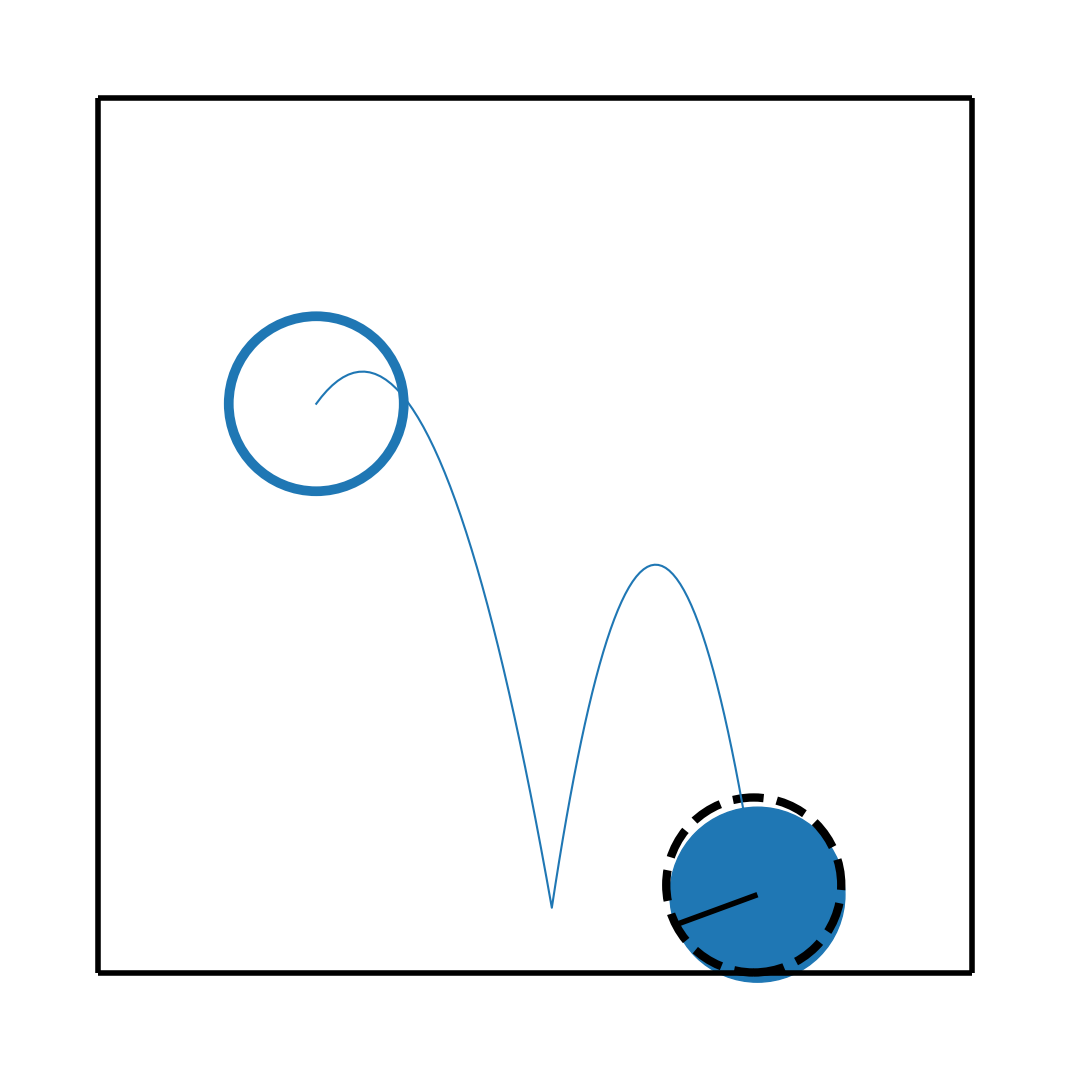

In [7]:
plot_helper("hit_BD1_homo_cor0.8_mu0.2")

/opt/anaconda3/lib/python3.12/site-packages/pytorch_lightning/utilities/cloud_io.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=map_l

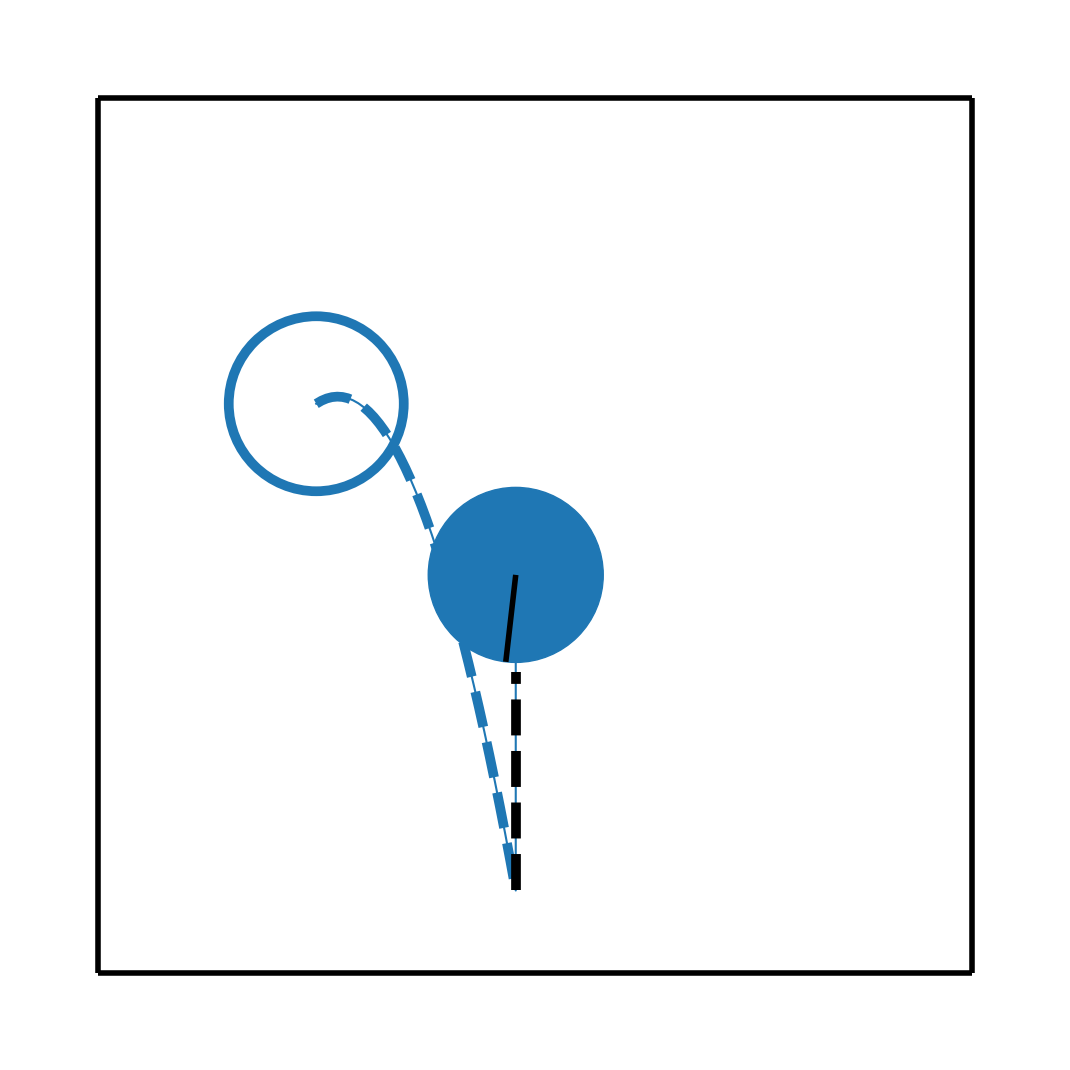

In [8]:
plot_helper("vertical_nospin_BD1_homo_cor0.8_mu0.2")

/opt/anaconda3/lib/python3.12/site-packages/pytorch_lightning/utilities/cloud_io.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=map_l

406 out of 800 trajectories contains collision.
50 out of 100 trajectories contains collision.
50 out of 100 trajectories contains collision.


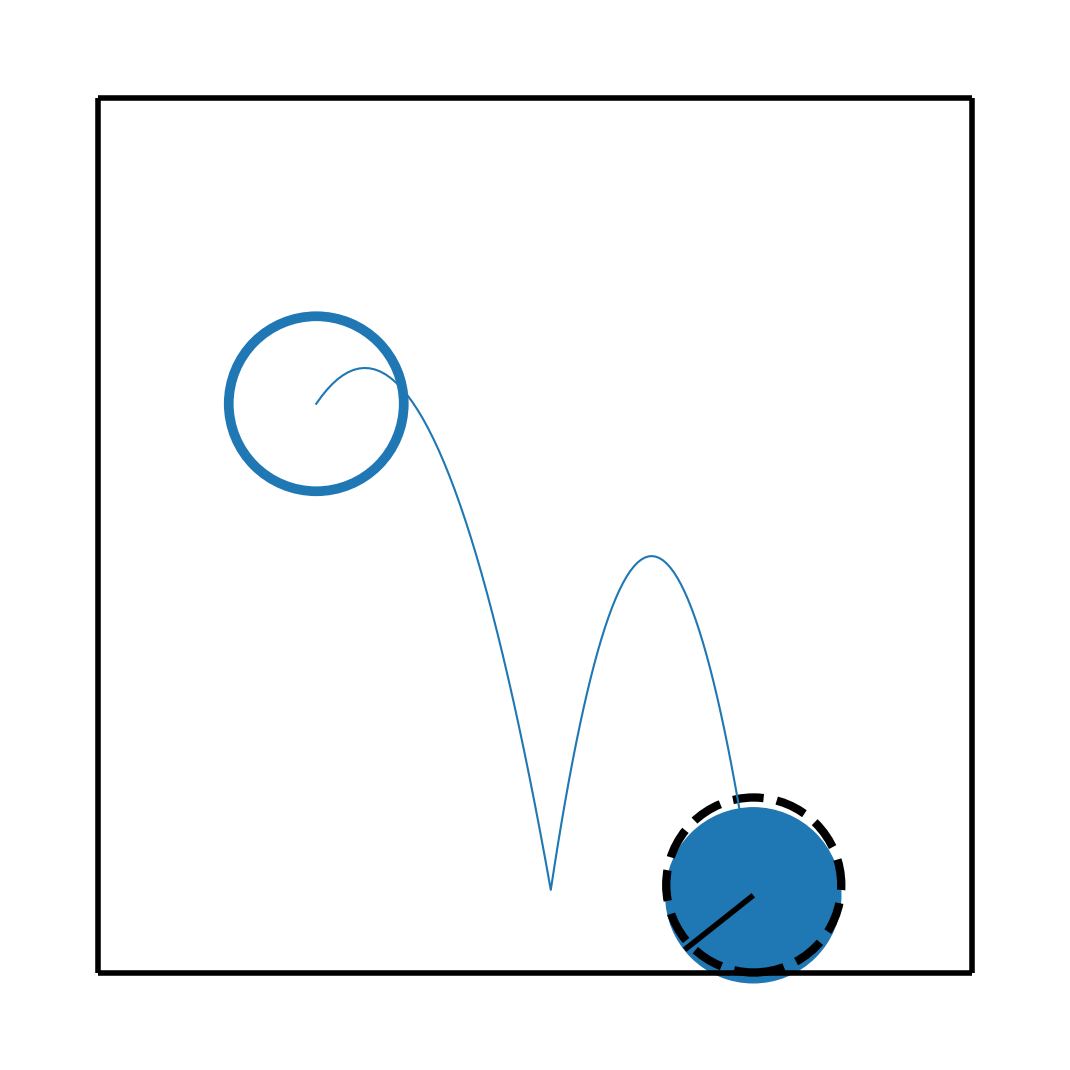

In [9]:
plot_helper("hit_BD1_homo_cor0.8_mu0.2_learned")

/opt/anaconda3/lib/python3.12/site-packages/pytorch_lightning/utilities/cloud_io.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=map_l

406 out of 800 trajectories contains collision.
50 out of 100 trajectories contains collision.
50 out of 100 trajectories contains collision.


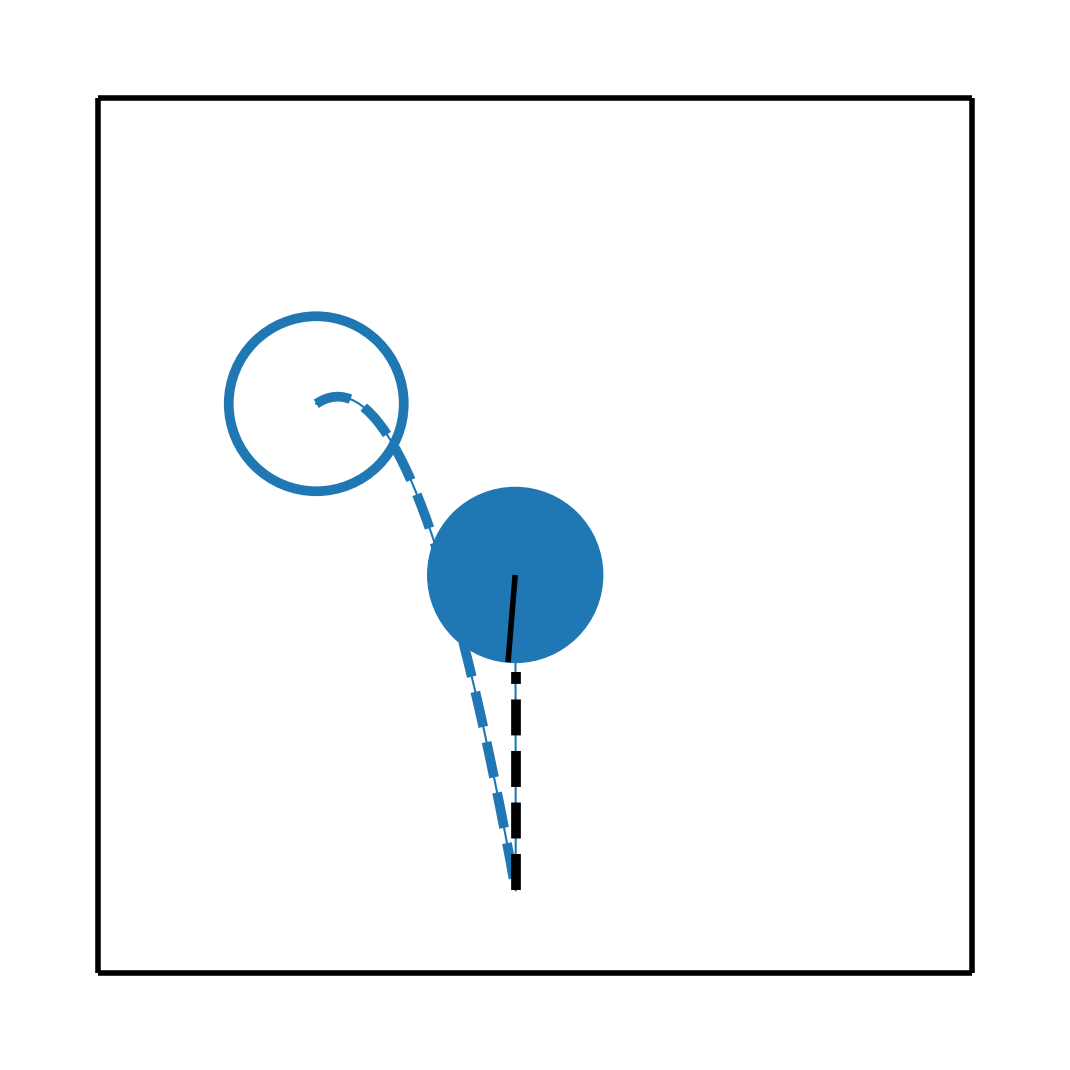

In [10]:
plot_helper("vertical_nospin_BD1_homo_cor0.8_mu0.2_learned")

In [11]:
# remove symlink
try:
    os.unlink('./logs')
    print("successfully unlink the directory")
except FileNotFoundError as e:
    print(e)
    

successfully unlink the directory
